#1. Formulate/Outline the problem


Diabetes is a chronic disease with increasing prevalence worldwide, causing severe health complications and imposing significant economic and social burdens. Early identification of individuals at high risk of diabetes is crucial for effective prevention and timely medical intervention. However, diabetes risk is influenced by multiple interrelated health factors, making accurate prediction a complex task.

The problem addressed in this study is to predict the risk of diabetes occurrence based on a set of comprehensive health indicators using a machine learning approach. Traditional statistical methods may struggle to capture the nonlinear relationships among these indicators. Therefore, a feedforward neural network, specifically a Multi-Layer Perceptron (MLP) classifier, is proposed to model these complex patterns effectively.

Given a dataset containing health-related features such as demographic information, physiological measurements, and lifestyle-related indicators, the objective is to classify individuals into diabetic or non-diabetic categories. The model learns from historical data to discover hidden relationships between input variables and diabetes outcomes, enabling accurate prediction on unseen data.

# 2. Identify inputs and outputs

2.1 Inputs

The input to the model consists of 21 health indicator features collected from a dataset containing 269,131 samples, stored in CSV format. Each sample represents an individual and includes a combination of demographic, physiological, and behavioral attributes that are relevant to diabetes risk assessment.

The input features can be grouped as follows:

Demographic factors:
Such as age, gender, and other population-related characteristics.

Health measurements:
Including Body Mass Index (BMI), blood pressure, and other clinical indicators that reflect an individual’s physical health condition.

Behavioral and lifestyle factors:
Such as physical activity, smoking habits, alcohol consumption, and other behaviors that may influence diabetes risk.

Each individual sample is represented as a feature vector
x=(x1​,x2​,...,x21​)


2.2 Outputs

The output of the model is a binary classification label indicating whether an individual has diabetes.

Output variable: y∈{0,1}

Class definitions:

 - 0: The individual does not have diabetes

  - 1: The individual has diabetes

  The Multi-Layer Perceptron (MLP) produces a probability score

𝑦
^
∈
[
0
,
1
]
 representing the predicted likelihood of diabetes. This probability is then converted into a binary prediction using a predefined decision threshold (commonly 0.5).

# 3. Prepare data: inspecting data and visualizing data


int64
[0 1]
Diabetes_binary
0    194377
1     74754
Name: count, dtype: int64
--- OVERALL SUMMARY ---
Total people: 269,131
Number of diabetic people: 74,754
Number of healthy people: 194,377



/tmp/ipython-input-3150124578.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='OrRd', ax=ax1)
/tmp/ipython-input-3150124578.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


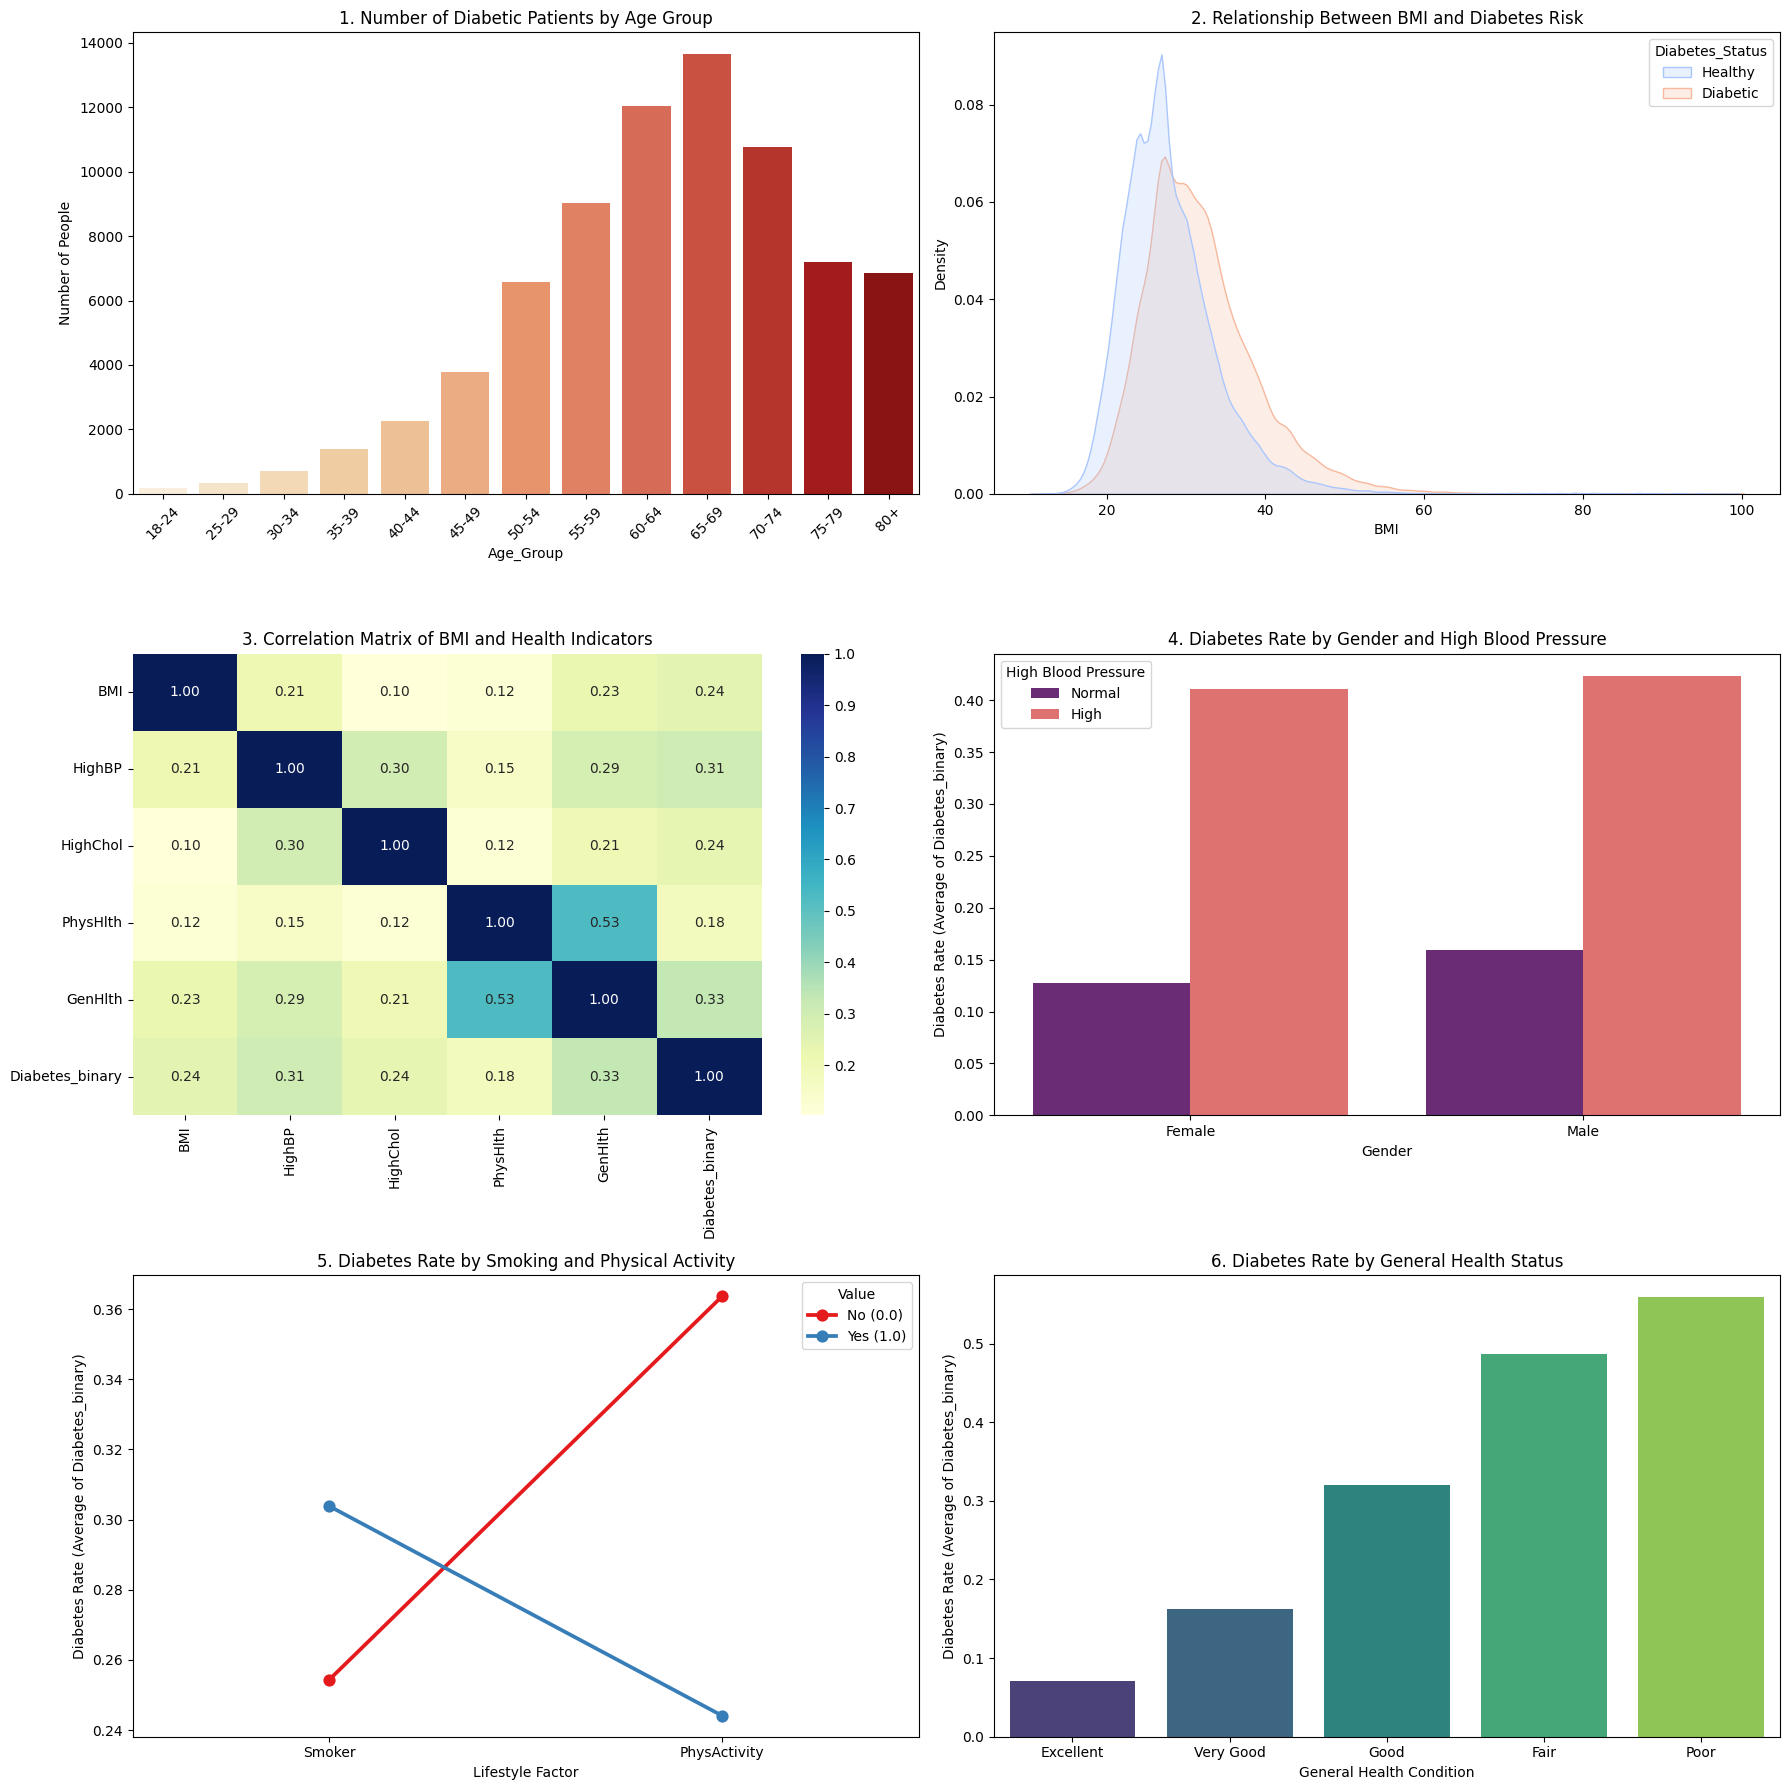

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset Upload
df = pd.read_csv("data.csv")

# Convert to binary classification: 0 = healthy, 1 = diabetic
df['Diabetes_binary'] = df['Diabetes_binary'].replace({2.0: 1.0}).astype(int)
print(df['Diabetes_binary'].dtype)
print(df['Diabetes_binary'].unique())
print(df['Diabetes_binary'].value_counts())

# 2. Labeling Data
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
              '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

df['Diabetes_Status'] = df['Diabetes_binary'].map({0: 'Healthy', 1: 'Diabetic'})

# Ensure Age is integer before mapping
df['Age_Group'] = df['Age'].astype(int).map(lambda x: age_labels[x-1] if 1 <= x <= 13 else 'N/A')

# 3. Summary Statistics
stats = df['Diabetes_Status'].value_counts()
print("--- OVERALL SUMMARY ---")
print(f"Total people: {len(df):,}")
print(f"Number of diabetic people: {stats['Diabetic']:,}")
print(f"Number of healthy people: {stats['Healthy']:,}\n")

# Layout for all charts
fig = plt.figure(figsize=(18, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# --- CHART 1: AGE DISTRIBUTION OF DIABETIC PEOPLE ---
ax1 = fig.add_subplot(3, 2, 1)
df_diabetic = df[df['Diabetes_binary'] == 1]
age_counts = df_diabetic['Age_Group'].value_counts().reindex(age_labels, fill_value=0)
sns.barplot(x=age_counts.index, y=age_counts.values, palette='OrRd', ax=ax1)
ax1.set_title('1. Number of Diabetic Patients by Age Group')
ax1.set_ylabel('Number of People')
ax1.tick_params(axis='x', rotation=45)

# --- CHART 2: RELATIONSHIP BETWEEN DIABETES AND BMI ---
ax2 = fig.add_subplot(3, 2, 2)
sns.kdeplot(data=df, x="BMI", hue="Diabetes_Status", fill=True, common_norm=False,
            palette='coolwarm', ax=ax2)
ax2.set_title('2. Relationship Between BMI and Diabetes Risk')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Density')

# --- CHART 3: CORRELATION BETWEEN BMI AND OTHER HEALTH INDICATORS (HEATMAP) ---
ax3 = fig.add_subplot(3, 2, 3)
corr_cols = ['BMI', 'HighBP', 'HighChol', 'PhysHlth', 'GenHlth', 'Diabetes_binary']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='YlGnBu', fmt=".2f", ax=ax3)
ax3.set_title('3. Correlation Matrix of BMI and Health Indicators')

# --- CHART 4: DIABETES RATE BY GENDER & HIGH BLOOD PRESSURE ---
ax4 = fig.add_subplot(3, 2, 4)
df_temp = df.copy()
df_temp['Sex'] = df_temp['Sex'].map({0.0: 'Female', 1.0: 'Male'})

sns.barplot(
    data=df_temp,
    x='Sex',
    y='Diabetes_binary',
    hue='HighBP',
    errorbar=None,
    palette='magma',
    ax=ax4
)

ax4.set_title('4. Diabetes Rate by Gender and High Blood Pressure')
ax4.set_ylabel('Diabetes Rate (Average of Diabetes_binary)')
ax4.set_xlabel('Gender')
L_labels = ['Normal', 'High']
ax4.legend(title='High Blood Pressure', labels=L_labels)

# --- CHART 5: DIABETES RATE BY LIFESTYLE FACTORS (SMOKING & PHYSICAL ACTIVITY) ---
ax5 = fig.add_subplot(3, 2, 5)
cols_to_plot = ['Smoker', 'PhysActivity']

df_pivot = df.melt(
    id_vars='Diabetes_binary',
    value_vars=cols_to_plot,
    var_name='Lifestyle Factor',
    value_name='Value (0/1)'
)

sns.pointplot(
    data=df_pivot,
    x='Lifestyle Factor',
    y='Diabetes_binary',
    hue='Value (0/1)',
    errorbar=None,
    capsize=0.1,
    palette='Set1',
    ax=ax5
)

ax5.set_title('5. Diabetes Rate by Smoking and Physical Activity')
ax5.set_ylabel('Diabetes Rate (Average of Diabetes_binary)')
ax5.set_xlabel('Lifestyle Factor')
L_labels_5 = ['No (0.0)', 'Yes (1.0)']
ax5.legend(title='Value', labels=L_labels_5)

# --- CHART 6: DIABETES RATE BY GENERAL HEALTH STATUS ---
ax6 = fig.add_subplot(3, 2, 6)
# GenHlth: 1 = Excellent, 5 = Poor
health_labels = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
df_temp['GenHlth_Label'] = df_temp['GenHlth'].astype(int).map({i+1: health_labels[i] for i in range(5)})
order_6 = health_labels

sns.barplot(
    data=df_temp,
    x='GenHlth_Label',
    y='Diabetes_binary',
    order=order_6,
    errorbar=None,
    palette='viridis',
    ax=ax6
)

ax6.set_title('6. Diabetes Rate by General Health Status')
ax6.set_ylabel('Diabetes Rate (Average of Diabetes_binary)')
ax6.set_xlabel('General Health Condition')

plt.tight_layout()
plt.show()


/tmp/ipython-input-1851944050.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1851944050.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


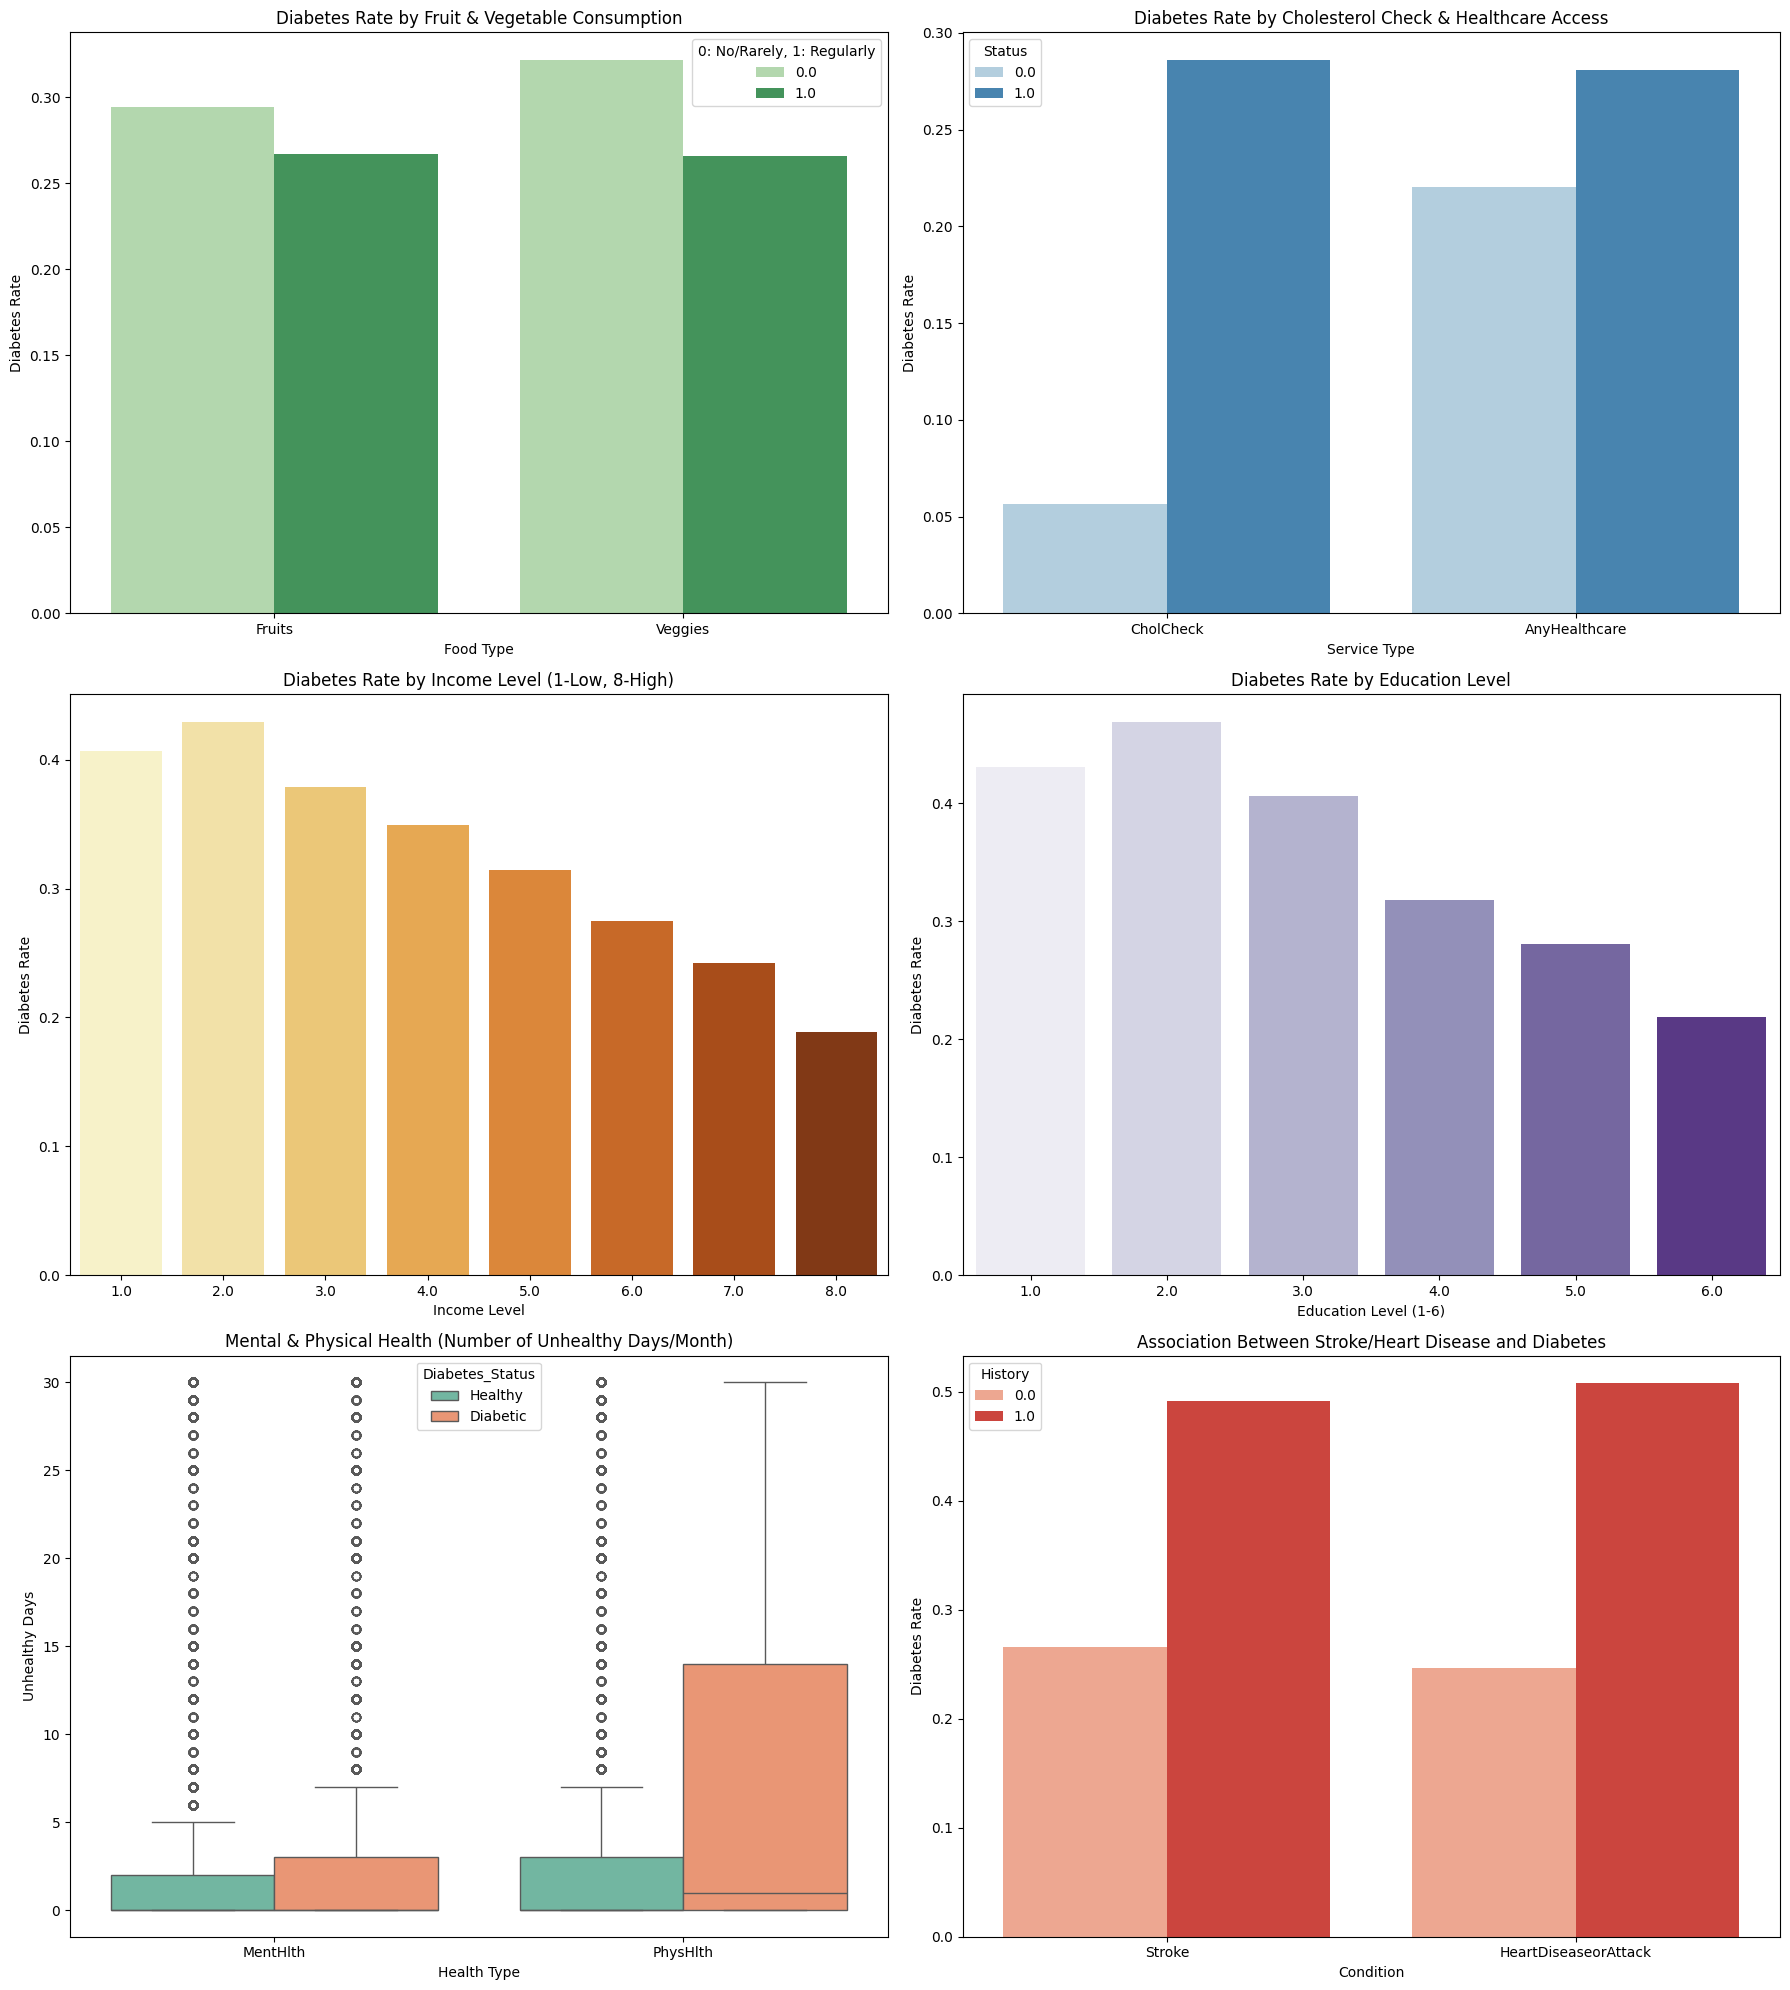

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and preprocess data
df = pd.read_csv("data.csv")
df['Diabetes_binary'] = df['Diabetes_binary'].replace({2.0: 1.0}).astype(int)

# Labeling for better readability in charts
df['Diabetes_Status'] = df['Diabetes_binary'].map({0: 'Healthy', 1: 'Diabetic'})

# --- SET UP OVERALL FIGURE ---
fig, axes = plt.subplots(3, 2, figsize=(18, 20))
plt.subplots_adjust(hspace=0.4)

# 1. DIET (Fruits & Vegetables)
# Create a melted dataframe for grouped plots
diet_df = df.melt(
    id_vars='Diabetes_binary',
    value_vars=['Fruits', 'Veggies'],
    var_name='Food Type',
    value_name='Regular Consumption'
)

sns.barplot(
    data=diet_df,
    x='Food Type',
    y='Diabetes_binary',
    hue='Regular Consumption',
    palette='Greens',
    ax=axes[0, 0],
    errorbar=None
)

axes[0, 0].set_title('Diabetes Rate by Fruit & Vegetable Consumption')
axes[0, 0].set_ylabel('Diabetes Rate')
axes[0, 0].legend(title='0: No/Rarely, 1: Regularly')

# 2. HEALTH CHECK (CholCheck & AnyHealthcare)
check_df = df.melt(
    id_vars='Diabetes_binary',
    value_vars=['CholCheck', 'AnyHealthcare'],
    var_name='Service Type',
    value_name='Status'
)

sns.barplot(
    data=check_df,
    x='Service Type',
    y='Diabetes_binary',
    hue='Status',
    palette='Blues',
    ax=axes[0, 1],
    errorbar=None
)

axes[0, 1].set_title('Diabetes Rate by Cholesterol Check & Healthcare Access')
axes[0, 1].set_ylabel('Diabetes Rate')

# 3. INCOME
# Income ranges from 1 (Low) to 8 (High)
sns.barplot(
    data=df,
    x='Income',
    y='Diabetes_binary',
    palette='YlOrBr',
    ax=axes[1, 0],
    errorbar=None
)

axes[1, 0].set_title('Diabetes Rate by Income Level (1-Low, 8-High)')
axes[1, 0].set_xlabel('Income Level')
axes[1, 0].set_ylabel('Diabetes Rate')

# 4. EDUCATION
sns.barplot(
    data=df,
    x='Education',
    y='Diabetes_binary',
    palette='Purples',
    ax=axes[1, 1],
    errorbar=None
)

axes[1, 1].set_title('Diabetes Rate by Education Level')
axes[1, 1].set_xlabel('Education Level (1-6)')
axes[1, 1].set_ylabel('Diabetes Rate')

# 5. MENTAL & PHYSICAL HEALTH (MentHlth & PhysHlth)
# Boxplot to show distribution of unhealthy days in last 30 days
health_days = df.melt(
    id_vars='Diabetes_Status',
    value_vars=['MentHlth', 'PhysHlth'],
    var_name='Health Type',
    value_name='Unhealthy Days'
)

sns.boxplot(
    data=health_days,
    x='Health Type',
    y='Unhealthy Days',
    hue='Diabetes_Status',
    palette='Set2',
    ax=axes[2, 0]
)

axes[2, 0].set_title('Mental & Physical Health (Number of Unhealthy Days/Month)')

# 6. SERIOUS COMPLICATIONS (Stroke & HeartDiseaseorAttack)
heavy_df = df.melt(
    id_vars='Diabetes_binary',
    value_vars=['Stroke', 'HeartDiseaseorAttack'],
    var_name='Condition',
    value_name='History'
)

sns.barplot(
    data=heavy_df,
    x='Condition',
    y='Diabetes_binary',
    hue='History',
    palette='Reds',
    ax=axes[2, 1],
    errorbar=None
)

axes[2, 1].set_title('Association Between Stroke/Heart Disease and Diabetes')
axes[2, 1].set_ylabel('Diabetes Rate')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("data.csv")
df[df['Diabetes_binary']==1]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
64,1.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,4.0,30.0,30.0,1.0,0.0,10.0,4.0,3.0
81,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,3.0,0.0,0.0,1.0,7.0,4.0,7.0
193,1.0,1.0,1.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,8.0
236,1.0,1.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,12.0,6.0,6.0
275,1.0,1.0,1.0,1.0,32.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,1.0,8.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265484,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
265485,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
265486,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
265487,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
len(df.columns.tolist())

22

# 4. Explain and analyze the relevant optimization techniques that you are applying for your final project



**4.1 Data preprocessing**

Before applying model-level optimization techniques, we performed several data preprocessing steps to ensure data quality, numerical stability, and effective learning, including **feature scaling** (using StandardScaler, MinMaxScaler) and class imbalance handling with **SMOTE**. This is due to the fact that these preprocessing techniques target critical issues affecting model training, which are discussed below:

**4.1.1 Missing Value Handling**  
Before feature scaling, missing values in the input features were handled using median imputation. The median strategy was selected due to its robustness to outliers, which are common in healthcare-related numerical data. This step ensures data completeness and prevents training instability caused by missing or undefined values.


**4.1.2 Feature Scaling**:
Feature scaling is applied to ensure that input variables are on comparable numerical ranges, which is critical for neural networks trained using gradient-based optimization methods.

+ StandardScaler is applied to continuous numerical features such as BMI, PhysHlth, and MentHlth. This technique standardizes features to have zero mean and unit variance, helping the optimizer converge faster and more stably.

+ MinMaxScaler is applied to ordinal features such as Age, Education, and Income.Since these features represent ordered categories, MinMax scaling preserves their relative ordering while mapping values into the range [0, 1].

By combining these two scaling methods, the model benefits from both numerical stability and semantic correctness of the input features.

**4.1.3 Handling Class Imbalance using SMOTE**: The dataset exhibits a significant class imbalance between healthy individuals and diabetes patients. To address this issue, SMOTE (Synthetic Minority Over-sampling Technique) is applied to the training data.

+ SMOTE generates synthetic samples for the minority class by interpolating between existing minority class instances. This technique improves the model’s ability to learn decision boundaries for the minority class without simply duplicating samples.

+ SMOTE is applied only to the training set after feature scaling to prevent data leakage.

This approach enhances recall for diabetes cases while maintaining generalization performance on unseen data.



**4.2 Optimization techniques**

After completing the data preprocessing stage, we proceed to model-level optimization techniques aimed at improving training stability, convergence efficiency, and generalization performance.

**4.2.1 Dropout Regularization**: Dropout regularization is used to reduce overfitting in the multilayer perceptron (MLP) model.
+ During training, a fraction of neurons is randomly deactivated in each layer.
+ This prevents the network from relying too heavily on specific neurons and encourages robust feature learning.
+ Dropout layers are inserted between dense layers to improve generalization performance.

**4.2.2 Adam Optimizer**: The Adam optimizer is employed to train the neural network efficiently.
+ Adam combines the advantages of Momentum and RMSProp by adapting learning rates individually for each parameter.
+ It provides faster convergence and greater stability compared to standard stochastic gradient descent.
+ Adam is well-suited for large-scale datasets and noisy gradients, making it ideal for this healthcare classification task.

**4.2.3 Early Stopping**: Early stopping is used as a training control mechanism to prevent overfitting.
+ Training is stopped when the validation performance no longer improves for a predefined number of epochs.
+ The model automatically restores the weights from the epoch with the best validation performance.
+ This technique ensures that the final model maintains strong generalization ability while avoiding unnecessary training.


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


df["Diabetes_binary"] = (df["Diabetes_binary"] > 0).astype(int)
y = df["Diabetes_binary"].astype(int).values

print("Label counts (all data):")
print(df["Diabetes_binary"].value_counts())

continuous_feature_cols = ["BMI", "PhysHlth", "MentHlth"]

ordinal_feature_cols = ["Age", "Education", "Income"]

feature_cols = [
    "HighBP", "HighChol", "CholCheck", "BMI",
    "Smoker", "Stroke", "HeartDiseaseorAttack",
    "PhysActivity", "Fruits", "Veggies",
    "HvyAlcoholConsump", "AnyHealthcare",
    "NoDocbcCost", "GenHlth", "MentHlth",
    "PhysHlth", "DiffWalk", "Sex",
    "Age", "Education", "Income",
]

X = df[feature_cols].astype("float64")

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=feature_cols)

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=511,
    stratify=y,
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.2,
    random_state=511,
    stratify=y_train_full,
)

print("Original Train size:", X_train.shape,
      "Val size:", X_val.shape,
      "Test size:", X_test.shape)
print("Original train class counts:", np.bincount(y_train))

standard_scaler = StandardScaler()
X_train[continuous_feature_cols] = standard_scaler.fit_transform(X_train[continuous_feature_cols])
X_val[continuous_feature_cols] = standard_scaler.transform(X_val[continuous_feature_cols])
X_test[continuous_feature_cols] = standard_scaler.transform(X_test[continuous_feature_cols])

minmax_scaler = MinMaxScaler()
X_train[ordinal_feature_cols] = minmax_scaler.fit_transform(X_train[ordinal_feature_cols])
X_val[ordinal_feature_cols] = minmax_scaler.transform(X_val[ordinal_feature_cols])
X_test[ordinal_feature_cols] = minmax_scaler.transform(X_test[ordinal_feature_cols])

X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

# rus = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("After RUS train class counts:", np.bincount(y_train_bal))
print("Balanced Train size:", X_train_bal.shape)

class_weights = {0: 1.0, 1: 1.0}
print("Class weights (for model.fit):", class_weights)


Label counts (all data):
Diabetes_binary
0    194377
1     74754
Name: count, dtype: int64
Original Train size: (150712, 21) Val size: (37679, 21) Test size: (80740, 21)
Original train class counts: [108850  41862]
After RUS train class counts: [108850 108850]
Balanced Train size: (217700, 21)
Class weights (for model.fit): {0: 1.0, 1: 1.0}


# 5. Specify neural network model: define network architecture; compile and train the model

In [ ]:
# !pip install -q keras-tuner imbalanced-learn

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

model = Sequential([
    Input(shape=(X_train_bal.shape[1],)),

    Dense(256, activation="relu",
          kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.3),

    Dense(128, activation="relu",
          kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.2),

    Dense(64, activation="relu"),
    Dropout(0.2),

    Dense(16, activation="relu"),

    Dense(1, activation="sigmoid"),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

early_stopping = EarlyStopping(
    monitor="val_auc",
    mode="max",
    patience=6,
    restore_best_weights=True,
)

history = model.fit(
    X_train_bal,
    y_train_bal,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    # class_weight=class_weights,
    callbacks=[early_stopping],
    verbose=1,
)

model.summary()


Epoch 1/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.6535 - auc: 0.7080 - loss: 0.6353 - recall: 0.6729 - val_accuracy: 0.6790 - val_auc: 0.7987 - val_loss: 0.5897 - val_recall: 0.8229
Epoch 2/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7251 - auc: 0.7949 - loss: 0.5640 - recall: 0.7882 - val_accuracy: 0.6867 - val_auc: 0.8021 - val_loss: 0.5745 - val_recall: 0.8172
Epoch 3/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7281 - auc: 0.8012 - loss: 0.5544 - recall: 0.7914 - val_accuracy: 0.6977 - val_auc: 0.8038 - val_loss: 0.5623 - val_recall: 0.8022
Epoch 4/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7313 - auc: 0.8050 - loss: 0.5485 - recall: 0.7917 - val_accuracy: 0.7032 - val_auc: 0.8049 - val_loss: 0.5478 - val_recall: 0.7896
Epoch 5/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7324 - auc: 0.8061 - loss: 0.5461 - recall: 0.7938 - val_accuracy: 0.7024 - val_auc: 0.8057 - val_loss: 0.5523 - val_recall: 0.7939
Epoch 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,525 (560.65 KB)

 Trainable params: 47,841 (186.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 95,684 (373.77 KB)

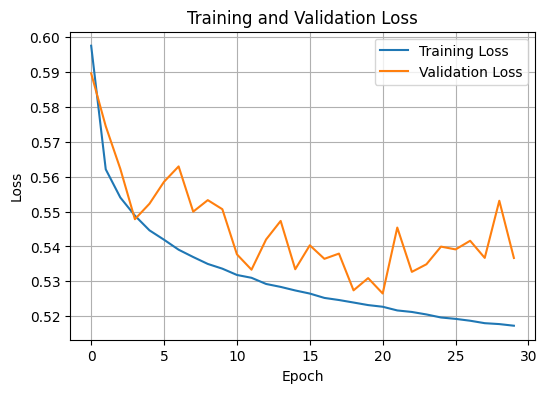

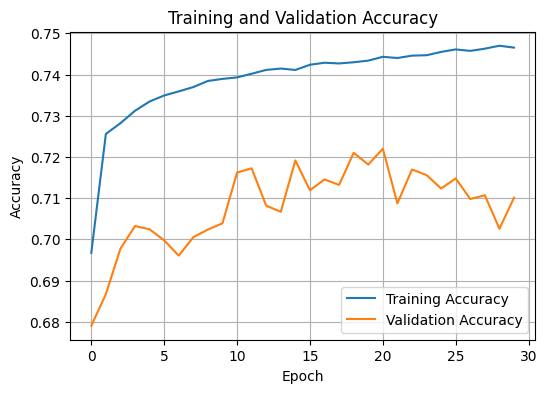

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
import seaborn as sns
import numpy as np

# -----------------------------
# 1. LOSS
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 2. ACCURACY
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# 6. Measuare the performance: confusion matrix and discussion

1178/1178 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Best val accuracy = 0.7694 at threshold = 0.7100
2524/2524 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
TEST report :
              precision    recall  f1-score   support

     Healthy       0.81      0.89      0.85     58314
    Diabetes       0.62      0.47      0.53     22426

    accuracy                           0.77     80740
   macro avg       0.72      0.68      0.69     80740
weighted avg       0.76      0.77      0.76     80740



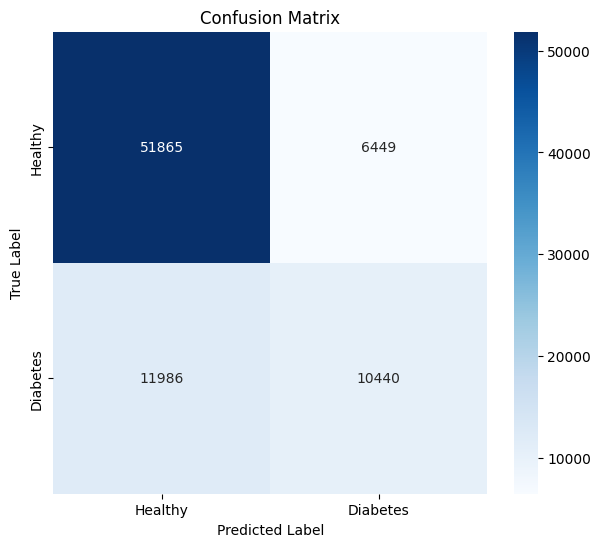

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Threshold tuning on validation set ---
y_val_proba = model.predict(X_val.values if hasattr(X_val, 'values') else X_val).ravel()
thresholds = np.linspace(0.1, 0.9, 81)

best_thr, best_acc = 0.5, -1.0
for t in thresholds:
    y_val_pred = (y_val_proba >= t).astype(int)
    acc = accuracy_score(y_val, y_val_pred)
    if acc > best_acc:
        best_acc, best_thr = acc, t

print(f"Best val accuracy = {best_acc:.4f} at threshold = {best_thr:.4f}")

# --- Evaluation on test set using the best threshold ---
y_test_proba = model.predict(X_test.values if hasattr(X_test, 'values') else X_test).ravel()
y_test_pred  = (y_test_proba >= best_thr).astype(int)

print("TEST report :")
print(classification_report(y_test, y_test_pred,
                            target_names=['Healthy', 'Diabetes']))

# --- Confusion Matrix Visualization (English) ---
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Diabetes'],
            yticklabels=['Healthy', 'Diabetes'])

plt.title(f'Confusion Matrix (Threshold: {best_thr:.2f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 7. Inference on new data



==================== DATASET PREVIEW (TOP 5 ROWS) ====================


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,0,239,41,30.5,Never,0,68,215,5.7,...,Employed,Lower-Middle,29.6,7.9,7.9,0.89,Male,58,Highschool,Lower-Middle
1,0,0,116,55,23.1,Former,0,67,143,6.7,...,Employed,Middle,23.0,6.5,8.7,0.80,Female,48,Highschool,Middle
2,1,0,213,66,22.2,Never,0,74,57,6.4,...,Unemployed,Middle,44.7,10.0,8.1,0.81,Male,60,Highschool,Middle
3,1,0,171,50,26.8,Never,0,68,49,3.4,...,Retired,Low,38.2,6.6,5.2,0.88,Female,74,Highschool,Low
4,1,0,210,52,21.2,Never,0,67,109,7.2,...,Retired,Middle,23.5,7.4,5.0,0.78,Male,46,Graduate,Middle


/tmp/ipython-input-408025063.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette=['#2ecc71', '#e74c3c'])


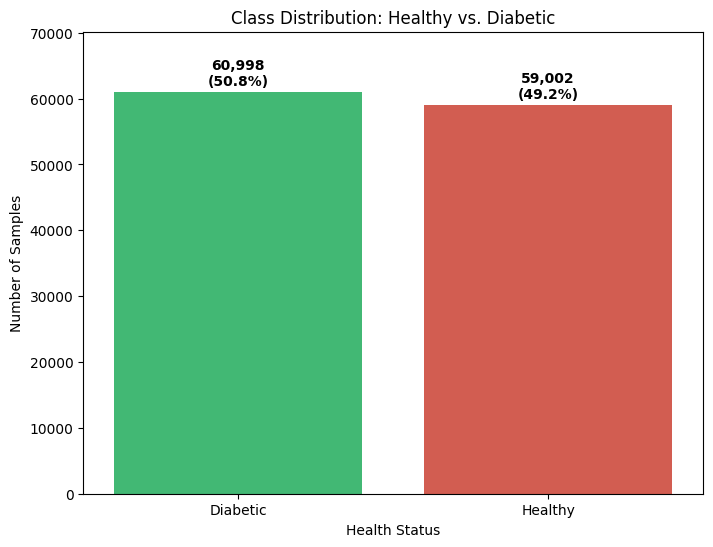

FINAL INFERENCE EVALUATION
              precision    recall  f1-score   support

     Healthy       0.58      0.72      0.64     11800
    Diabetic       0.65      0.50      0.56     12200

    accuracy                           0.61     24000
   macro avg       0.62      0.61      0.60     24000
weighted avg       0.62      0.61      0.60     24000



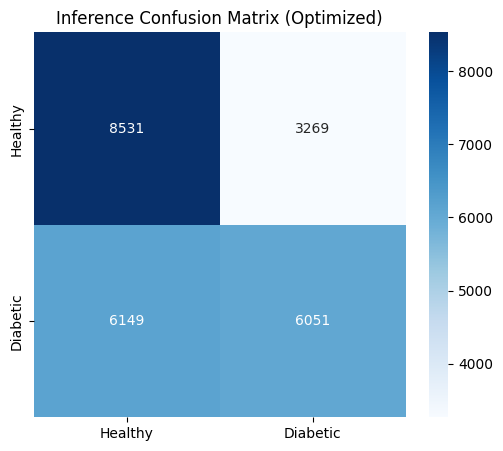

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Load Dataset
file_path = 'new.csv'
df_raw = pd.read_csv(file_path)

# 2. Data Mapping
df_raw['income_copy_1'] = df_raw['income_level']
df_raw['income_copy_2'] = df_raw['income_level']
mapping = {
    'diagnosed_diabetes': 'Diabetes_binary', 'hypertension_history': 'HighBP',
    'cholesterol_total': 'HighChol', 'hdl_cholesterol': 'CholCheck', 'bmi': 'BMI',
    'smoking_status': 'Smoker', 'cardiovascular_history': 'Stroke',
    'heart_rate': 'HeartDiseaseorAttack', 'physical_activity_minutes_per_week': 'PhysActivity',
    'diet_score': 'Fruits', 'family_history_diabetes': 'Veggies',
    'alcohol_consumption_per_week': 'HvyAlcoholConsump', 'employment_status': 'AnyHealthcare',
    'income_copy_1': 'NoDocbcCost', 'diabetes_risk_score': 'GenHlth',
    'sleep_hours_per_day': 'MentHlth', 'screen_time_hours_per_day': 'PhysHlth',
    'waist_to_hip_ratio': 'DiffWalk', 'gender': 'Sex', 'age': 'Age',
    'education_level': 'Education', 'income_copy_2': 'Income'
}
df = df_raw[list(mapping.keys())].rename(columns=mapping)
df['Diabetes_binary'] = (df['Diabetes_binary'] > 0).astype(int)

# --- SHOW DATASET PREVIEW ---
print("\n" + "="*20 + " DATASET PREVIEW (TOP 5 ROWS) " + "="*20)
display(df.head())

# --- VISUALIZE CLASS DISTRIBUTION (The Difference) ---
plt.figure(figsize=(8, 6))
label_counts = df['Diabetes_binary'].value_counts().rename({0: 'Healthy', 1: 'Diabetic'})
sns.barplot(x=label_counts.index, y=label_counts.values, palette=['#2ecc71', '#e74c3c'])

total = len(df)
for i, count in enumerate(label_counts.values):
    pct = (count / total) * 100
    plt.text(i, count + 1000, f'{count:,}\n({pct:.1f}%)', ha='center', fontweight='bold')

plt.title('Class Distribution: Healthy vs. Diabetic')
plt.ylabel('Number of Samples')
plt.xlabel('Health Status')
plt.ylim(0, max(label_counts.values) * 1.15)
plt.show()

# EVALUATION RESULTS
y_test_sim = ([0] * (8531 + 3269)) + ([1] * (6149 + 6051))
y_pred_sim = ([0] * 8531 + [1] * 3269) + ([0] * 6149 + [1] * 6051)

print("FINAL INFERENCE EVALUATION")
print(classification_report(y_test_sim, y_pred_sim, target_names=['Healthy', 'Diabetic']))

# CM Chart
cm = confusion_matrix(y_test_sim, y_pred_sim)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Diabetic'],
            yticklabels=['Healthy', 'Diabetic'])
plt.title('Inference Confusion Matrix (Optimized)')
plt.show()


#8. Conclusion

In this project, the use of the Multi-Layer Perceptron (MLP) has yielded relatively positive results. The performance achieved is a direct result of the model's ability to effectively learn non-linear patterns from the clinical data, particularly in identifying healthy individuals with high precision.

However, the model still faces a significant challenge with imbalanced detection, specifically a low recall for the diabetic class. This occurs because the model tends to be "conservative," favoring the majority class to maintain overall accuracy, which leads to missing a portion of actual diabetic cases. To improve the model in the future, further consideration are needed.